In [8]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [2]:
df = read.csv('diabetes.csv')

In [4]:
head(df)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,148,72,35,0,33.6,0.63,50,1
2,85,66,29,0,26.6,0.35,31,0
3,183,64,0,0,23.3,0.67,32,1
4,89,66,23,94,28.1,0.17,21,0
5,137,40,35,168,43.1,2.29,33,1
6,116,74,0,0,25.6,0.20,30,0


In [3]:
summary(df)

    Glucose      BloodPressure    SkinThickness      Insulin     
 Min.   :  0.0   Min.   :  0.00   Min.   : 0.00   Min.   :  0.0  
 1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00   1st Qu.:  0.0  
 Median :117.0   Median : 72.00   Median :23.00   Median : 30.5  
 Mean   :120.9   Mean   : 69.11   Mean   :20.54   Mean   : 79.8  
 3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00   3rd Qu.:127.2  
 Max.   :199.0   Max.   :122.00   Max.   :99.00   Max.   :846.0  
      BMI        DiabetesPedigreeFunction      Age           Outcome     
 Min.   : 0.00   Min.   :0.0800           Min.   :21.00   Min.   :0.000  
 1st Qu.:27.30   1st Qu.:0.2400           1st Qu.:24.00   1st Qu.:0.000  
 Median :32.00   Median :0.3700           Median :29.00   Median :0.000  
 Mean   :31.99   Mean   :0.4724           Mean   :33.24   Mean   :0.349  
 3rd Qu.:36.60   3rd Qu.:0.6300           3rd Qu.:41.00   3rd Qu.:1.000  
 Max.   :67.10   Max.   :2.4200           Max.   :81.00   Max.   :1.000  

In [5]:
df$Outcome = as.factor(df$Outcome)

In [6]:
summary(df)

    Glucose      BloodPressure    SkinThickness      Insulin     
 Min.   :  0.0   Min.   :  0.00   Min.   : 0.00   Min.   :  0.0  
 1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00   1st Qu.:  0.0  
 Median :117.0   Median : 72.00   Median :23.00   Median : 30.5  
 Mean   :120.9   Mean   : 69.11   Mean   :20.54   Mean   : 79.8  
 3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00   3rd Qu.:127.2  
 Max.   :199.0   Max.   :122.00   Max.   :99.00   Max.   :846.0  
      BMI        DiabetesPedigreeFunction      Age        Outcome
 Min.   : 0.00   Min.   :0.0800           Min.   :21.00   0:500  
 1st Qu.:27.30   1st Qu.:0.2400           1st Qu.:24.00   1:268  
 Median :32.00   Median :0.3700           Median :29.00          
 Mean   :31.99   Mean   :0.4724           Mean   :33.24          
 3rd Qu.:36.60   3rd Qu.:0.6300           3rd Qu.:41.00          
 Max.   :67.10   Max.   :2.4200           Max.   :81.00          

In [10]:
model = preProcess(df,method = 'range')

In [11]:
train_df = predict(model,newdata = df)

In [15]:
summary(train_df)

    Glucose       BloodPressure    SkinThickness       Insulin       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.4975   1st Qu.:0.5082   1st Qu.:0.0000   1st Qu.:0.00000  
 Median :0.5879   Median :0.5902   Median :0.2323   Median :0.03605  
 Mean   :0.6075   Mean   :0.5664   Mean   :0.2074   Mean   :0.09433  
 3rd Qu.:0.7048   3rd Qu.:0.6557   3rd Qu.:0.3232   3rd Qu.:0.15041  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
      BMI         DiabetesPedigreeFunction      Age           Outcome   
 Min.   :0.0000   Min.   :0.00000          Min.   :0.0000   Class0:500  
 1st Qu.:0.4069   1st Qu.:0.06838          1st Qu.:0.0500   Class1:268  
 Median :0.4769   Median :0.12393          Median :0.1333               
 Mean   :0.4768   Mean   :0.16769          Mean   :0.2040               
 3rd Qu.:0.5455   3rd Qu.:0.23504          3rd Qu.:0.3333               
 Max.   :1.0000   Max.   :1.00000          Max.   :1.0000               

In [13]:
head(train_df)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.7437186,0.5901639,0.3535354,0.0000000,0.5007452,0.23504274,0.4833333,Class1
2,0.4271357,0.5409836,0.2929293,0.0000000,0.3964232,0.11538462,0.1666667,Class0
3,0.9195980,0.5245902,0.0000000,0.0000000,0.3472429,0.25213675,0.1833333,Class1
4,0.4472362,0.5409836,0.2323232,0.1111111,0.4187779,0.03846154,0.0000000,Class0
5,0.6884422,0.3278689,0.3535354,0.1985816,0.6423249,0.94444444,0.2000000,Class1
6,0.5829146,0.6065574,0.0000000,0.0000000,0.3815201,0.05128205,0.1500000,Class0


In [12]:
levels(train_df$Outcome) = c('Class0','Class1')

In [19]:
mod1 = glm(Outcome ~ .-Outcome, data = train_df, family = 'binomial')

In [21]:
summary(mod1)


Call:
glm(formula = Outcome ~ . - Outcome, family = "binomial", data = train_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5802  -0.7285  -0.4332   0.7438   2.9185  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -7.65947    0.67748 -11.306  < 2e-16 ***
Glucose                   6.88437    0.72945   9.438  < 2e-16 ***
BloodPressure            -1.49034    0.63819  -2.335  0.01953 *  
SkinThickness             0.08276    0.68338   0.121  0.90361    
Insulin                  -1.15890    0.77140  -1.502  0.13301    
BMI                       5.89540    0.99659   5.916 3.31e-09 ***
DiabetesPedigreeFunction  2.08405    0.69220   3.011  0.00261 ** 
Age                       1.95961    0.48657   4.027 5.64e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.48  on 767  degrees of freedom
Residual devian

- Diabetes depends on the glucose levels of the person
- Diabetes depends on the BloodPressure levels of the person
- Diabetes **does not** depend on SkinThickness of the person
- Diabetes <strong>does not</strong> depend on the Insulin level of the person
- Diabetes depends on the BMI of the person
- Diabetes depends on the DiabetesPedigreeFunction of the person
- Diabetes depends on the Age of the person

In [29]:
head(predict(mod1,train_df,type = 'response'))

1          2          3          4          5          6 
0.73093196 0.06934637 0.69453973 0.04986430 0.92672670 0.13006140

In [68]:
ans = as.data.frame(predict(mod1,train_df,type = 'response'))

In [69]:
ans = round(ans*100,2)

In [70]:
head(ans)

,"predict(mod1, train_df, type = ""response"")"
,<dbl>
1,73.09
2,6.93
3,69.45
4,4.99
5,92.67
6,13.01


In [71]:
colnames(ans) = 'Probability'

In [82]:
ans_str = strsplit(toString(unlist(ans$Probability)),',')

In [83]:
ans_str = as.data.frame(sapply(ans_str, paste,'%',sep=''))

In [87]:
colnames(ans_str) = 'Probability'

In [88]:
head(ans_str)

,Probability
,<chr>
1,73.09%
2,6.93%
3,69.45%
4,4.99%
5,92.67%
6,13.01%


# Loan data

In [2]:
library(readxl)

In [3]:
df = read_excel('BankLoan.xlsx')

In [4]:
head(df)

Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
No,0,Graduate,No,6000,0,141,360,1,Urban,Y
Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y


In [5]:
df_ans = df[,c('Property_Area','ApplicantIncome','CoapplicantIncome','Loan_Status')]

In [6]:
df_ans$total_income = df_ans$ApplicantIncome + df_ans$CoapplicantIncome

In [7]:
df_ans = df_ans[-c(2,3)]

In [8]:
head(df_ans)

Property_Area,Loan_Status,total_income
<chr>,<chr>,<dbl>
Rural,N,6091
Urban,Y,3000
Urban,Y,4941
Urban,Y,6000
Urban,Y,9613
Urban,Y,3849


In [9]:
which(is.na(df_ans),arr.ind = TRUE)

row,col


In [10]:
df_ans$Loan_Status = ifelse(df_ans$Loan_Status == "N",0,1)

In [11]:
df_ans$Property_Area = as.factor(df$Property_Area)

In [12]:
mod3 = glm(Loan_Status ~ .,data = df_ans,family='binomial')

In [13]:
summary(mod3)


Call:
glm(formula = Loan_Status ~ ., family = "binomial", data = df_ans)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7521  -1.3780   0.7096   0.9193   1.1122  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)   
(Intercept)             5.203e-01  2.051e-01   2.537  0.01119 * 
Property_AreaSemiurban  7.949e-01  2.424e-01   3.280  0.00104 **
Property_AreaUrban      1.891e-01  2.415e-01   0.783  0.43362   
total_income           -1.070e-05  1.509e-05  -0.709  0.47816   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 609.96  on 491  degrees of freedom
Residual deviance: 597.15  on 488  degrees of freedom
AIC: 605.15

Number of Fisher Scoring iterations: 4


In [23]:
mod5 = glm(Loan_Status ~ Property_Area, data = df_ans,family = 'binomial')

In [24]:
summary(mod5)


Call:
glm(formula = Loan_Status ~ Property_Area, family = "binomial", 
    data = df_ans)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7285  -1.3693   0.7131   0.9222   0.9969  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)              0.4406     0.1713   2.572 0.010126 *  
Property_AreaSemiurban   0.7991     0.2422   3.300 0.000968 ***
Property_AreaUrban       0.1943     0.2413   0.805 0.420614    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 609.96  on 491  degrees of freedom
Residual deviance: 597.65  on 489  degrees of freedom
AIC: 603.65

Number of Fisher Scoring iterations: 4


In [27]:
mod5 = glm(Loan_Status ~ total_income, data = df_ans, family = 'binomial')

In [28]:
summary(mod5)


Call:
glm(formula = Loan_Status ~ total_income, family = "binomial", 
    data = df_ans)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5582  -1.5184   0.8514   0.8601   1.0611  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   8.782e-01  1.443e-01   6.085 1.16e-09 ***
total_income -1.156e-05  1.476e-05  -0.783    0.434    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 609.96  on 491  degrees of freedom
Residual deviance: 609.36  on 490  degrees of freedom
AIC: 613.36

Number of Fisher Scoring iterations: 4


- chances of increase in whether or not the loan is sanctioned isn't statistically significant for urban, but it is significant for semiurban. <em>**with respect to property being in rural area**</em>
- And chances of getting the loan sanctioned is highest if property is in Semiurban 

In [17]:
library(car)

Loading required package: carData


Attaching package: 'carData'


The following object is masked _by_ '.GlobalEnv':

    Salaries




In [14]:
library(performance)

In [18]:
check_collinearity(mod3)

,Term,VIF,SE_factor
,<chr>,<dbl>,<dbl>
1,Property_Area,1.000152,1.000076
2,total_income,1.000152,1.000076


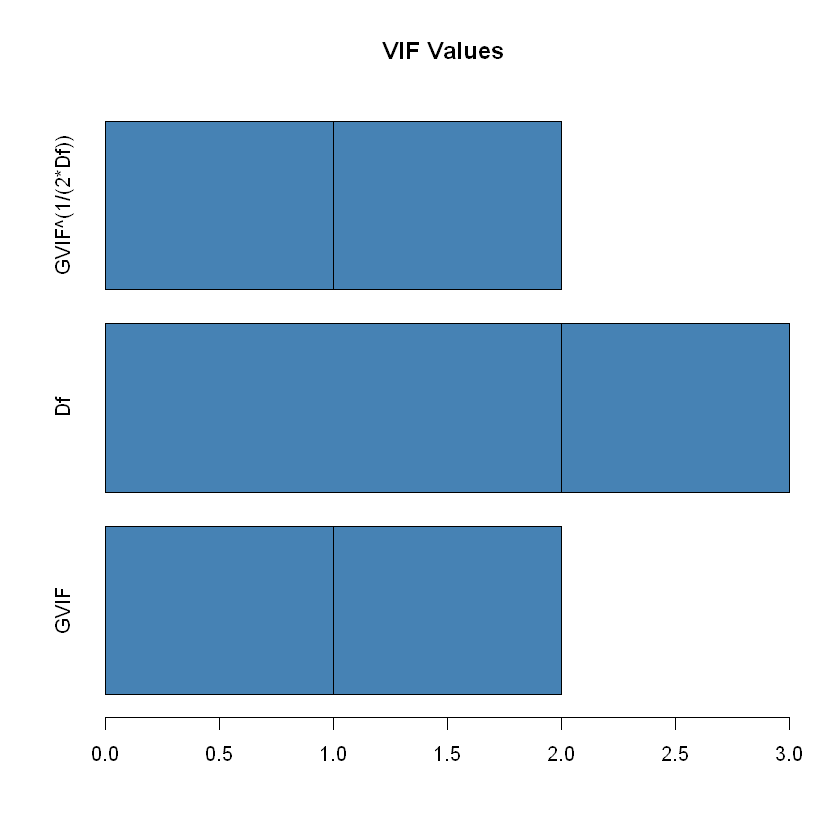

In [19]:
vif_values <- vif(mod3)
barplot(vif_values, main = "VIF Values", horiz = TRUE, col = "steelblue")
abline(v = 5, lwd = 3, lty = 2)
dev.new(width=5, height=4)

In [29]:
vif(mod3)

,GVIF,Df,GVIF^(1/(2*Df))
Property_Area,1.000838,2,1.000209
total_income,1.000838,1,1.000419


In [26]:
aov(mod3)

Call:
   aov(formula = mod3)

Terms:
                Property_Area total_income Residuals
Sum of Squares        2.58783      0.10924 102.72366
Deg. of Freedom             2            1       488

Residual standard error: 0.458802
Estimated effects may be unbalanced